# WeatherPy
#Challenge 6

---

##  Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#In the starter file size was 1500. I shortened it to 500, otherwise the program ran forever. I hope it's OK this way
#lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# Print the list of 10 cities
for city in cities[:10]:
    print(city)

Number of cities in the list: 593
haiku-pauwela
bethel
colonia rincon viejo
coahuayana de hidalgo
whitehorse
waitangi
stanley
illizi
buon ma thuot
port hedland


In [3]:

# Set the API base URL
OPENWEATHERMAP_URL = "https://api.openweathermap.org/data/2.5/weather"

# Make the API request for the first city in the list
response = requests.get(OPENWEATHERMAP_URL, params={
    "lat": lats[0],
    "lon": lngs[0],
    "appid": weather_api_key  # API key
})

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"{response.status_code}: {response.reason}, {response.content.decode()}")

# Convert response to JSON
places_data = response.json()

# Print the JSON (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))
    

{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 32.376,
        "lon": -147.4053
    },
    "dt": 1726428571,
    "id": 0,
    "main": {
        "feels_like": 297.74,
        "grnd_level": 1026,
        "humidity": 73,
        "pressure": 1026,
        "sea_level": 1026,
        "temp": 297.36,
        "temp_max": 297.36,
        "temp_min": 297.36
    },
    "name": "",
    "sys": {
        "sunrise": 1726414434,
        "sunset": 1726458930
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "gust": 7.44,
        "speed": 6.46
    }
}


In [4]:
# Compose the full URL with API key and lat/lon params
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[0]}&lon={lngs[0]}&appid={weather_api_key}"


# Make the API request for the first city in the list
response = requests.get(url)

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"{response.status_code}: {response.reason}, {response.content.decode()}")

# Convert response to JSON
places_data = response.json()

# Print the JSON (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 32.376,
        "lon": -147.4053
    },
    "dt": 1726428571,
    "id": 0,
    "main": {
        "feels_like": 297.74,
        "grnd_level": 1026,
        "humidity": 73,
        "pressure": 1026,
        "sea_level": 1026,
        "temp": 297.36,
        "temp_max": 297.36,
        "temp_min": 297.36
    },
    "name": "",
    "sys": {
        "sunrise": 1726414434,
        "sunset": 1726458930
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "gust": 7.44,
        "speed": 6.46
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        city_weather = response.json()
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | haiku-pauwela
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
City not found. Skipping...
Processing Record 3 of Set 1 | colonia rincon viejo
Processing Record 4 of Set 1 | coahuayana de hidalgo
City not found. Skipping...
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | waitangi
City not found. Skipping...
Processing Record 7 of Set 1 | stanley
City not found. Skipping...
Processing Record 8 of Set 1 | illizi
City not found. Skipping...
Processing Record 9 of Set 1 | buon ma thuot
Processing Record 10 of Set 1 | port hedland
Processing Record 11 of Set 1 | peniche
City not found. Skipping...
Processing Record 12 of Set 1 | klyuchi
City not found. Skipping...
Processing Record 13 of Set 1 | herning
City not found. Skipping...
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | shambu
City not 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          158
Lat           158
Lng           158
Max Temp      158
Humidity      158
Cloudiness    158
Wind Speed    158
Country       158
Date          158
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colonia rincon viejo,17.0713,-95.1282,305.61,63,55,2.50,MX,1726428574
1,whitehorse,62.6669,-140.8534,282.77,76,100,1.99,CA,1726428576
2,buon ma thuot,27.5031,6.8259,309.60,22,33,4.76,DZ,1726428580
3,port hedland,12.7777,108.3078,293.56,98,99,2.37,VN,1726428582
4,northam,56.0243,8.8741,287.12,86,100,2.43,DK,1726428586


In [8]:
# Convert Kelvin to Celsius
def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(kelvin_to_celsius)

city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colonia rincon viejo,17.0713,-95.1282,32.46,63,55,2.50,MX,1726428574
1,whitehorse,62.6669,-140.8534,9.62,76,100,1.99,CA,1726428576
2,buon ma thuot,27.5031,6.8259,36.45,22,33,4.76,DZ,1726428580
3,port hedland,12.7777,108.3078,20.41,98,99,2.37,VN,1726428582
4,northam,56.0243,8.8741,13.97,86,100,2.43,DK,1726428586
5,bredasdorp,-31.2003,118.0577,11.67,64,0,5.96,AU,1726428587
6,port glaud,9.7418,36.6230,14.44,96,95,1.86,ET,1726428590
7,ulladulla,-26.9830,142.5135,10.08,31,0,9.60,AU,1726428593
8,adamstown,44.9911,-118.6179,8.43,52,100,1.30,US,1726428598
9,tarko-sale,67.5736,114.1252,-0.69,90,100,2.74,RU,1726428605


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia rincon viejo,17.0713,-95.1282,32.46,63,55,2.50,MX,1726428574
1,whitehorse,62.6669,-140.8534,9.62,76,100,1.99,CA,1726428576
2,buon ma thuot,27.5031,6.8259,36.45,22,33,4.76,DZ,1726428580
3,port hedland,12.7777,108.3078,20.41,98,99,2.37,VN,1726428582
4,northam,56.0243,8.8741,13.97,86,100,2.43,DK,1726428586


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

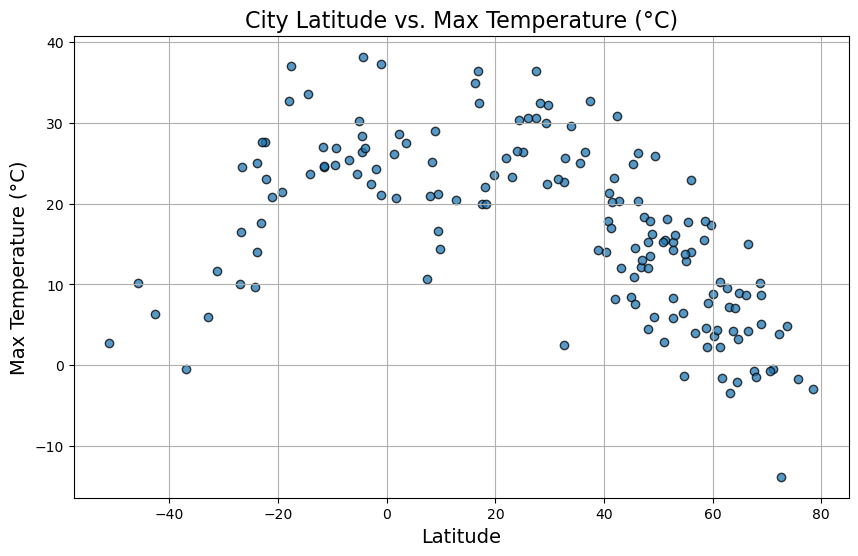

In [11]:
# Build scatter plot for latitude vs. temperature
#Convert Kelvin to C
city_data_df['Max Temp (C)'] = city_data_df['Max Temp']
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df['Max Temp (C)'], edgecolors="k", linewidths=1, alpha=0.75)


# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°C)", fontsize=14)

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

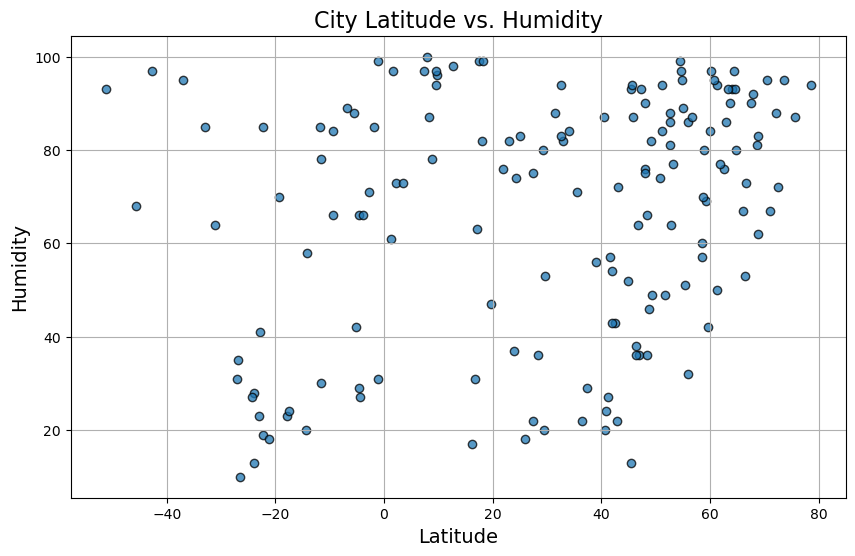

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

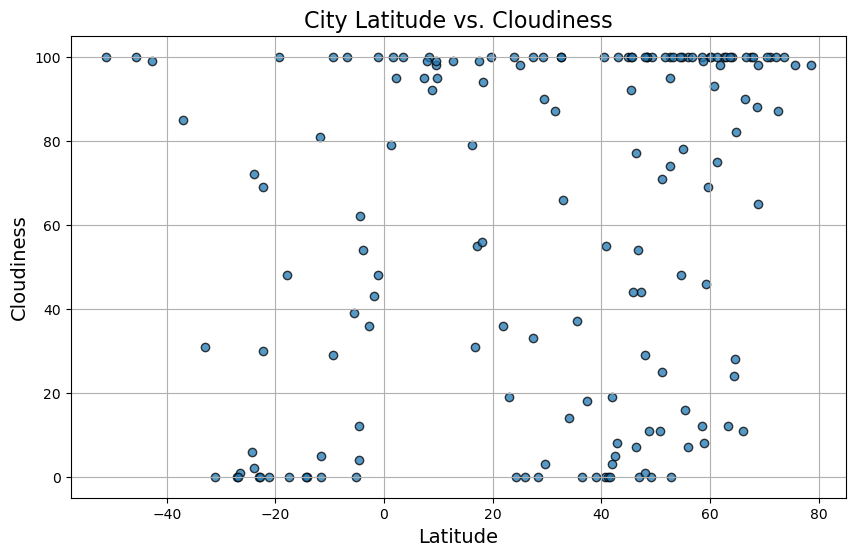

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

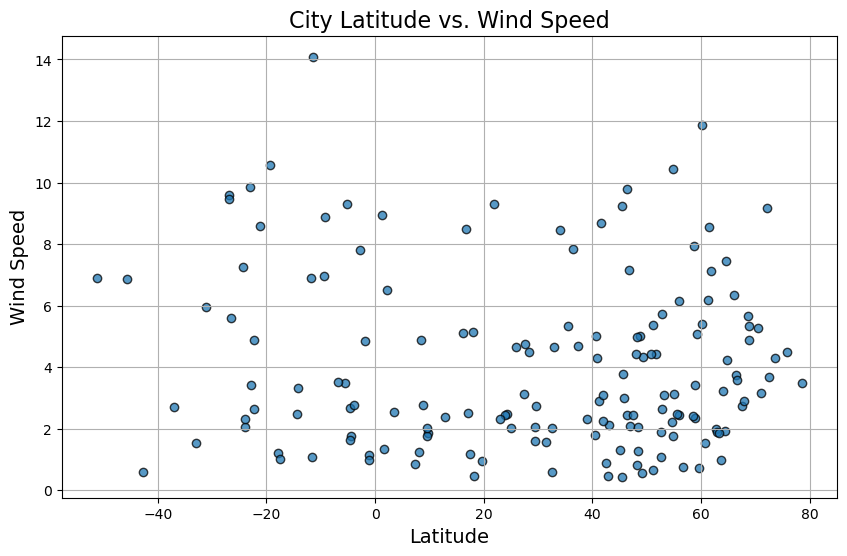

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


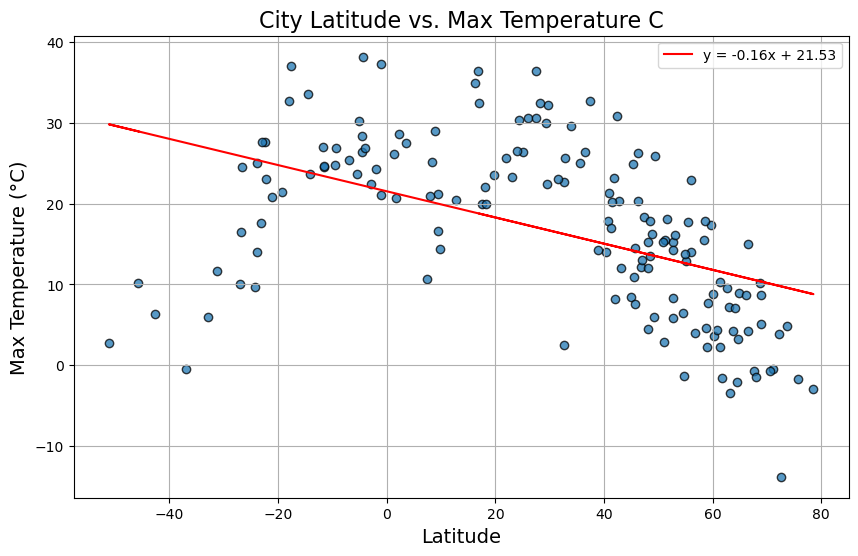

Correlation coefficient between Latitude and Max Temperature: PearsonRResult(statistic=-0.4911588786238215, pvalue=5.668650760658771e-11)


In [15]:

#Latitude vs Temperature Linear Regression
latitudes = city_data_df["Lat"]
max_temps = city_data_df['Max Temp (C)']

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, max_temps)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, max_temps, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature C", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°C)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")
plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, max_temps)
print(f"Correlation coefficient between Latitude and Max Temperature: {correlation}")


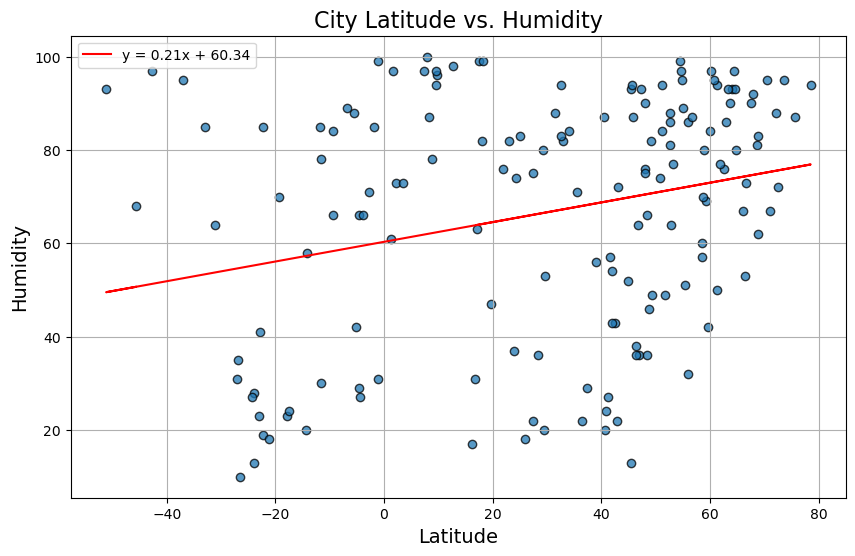

Correlation coefficient between Latitude and Humidity: PearsonRResult(statistic=0.25963041516327556, pvalue=0.0009867828830510785)


In [16]:
#Latitude vs Humidity Linear Regression
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, humidity)
print(f"Correlation coefficient between Latitude and Humidity: {correlation}")

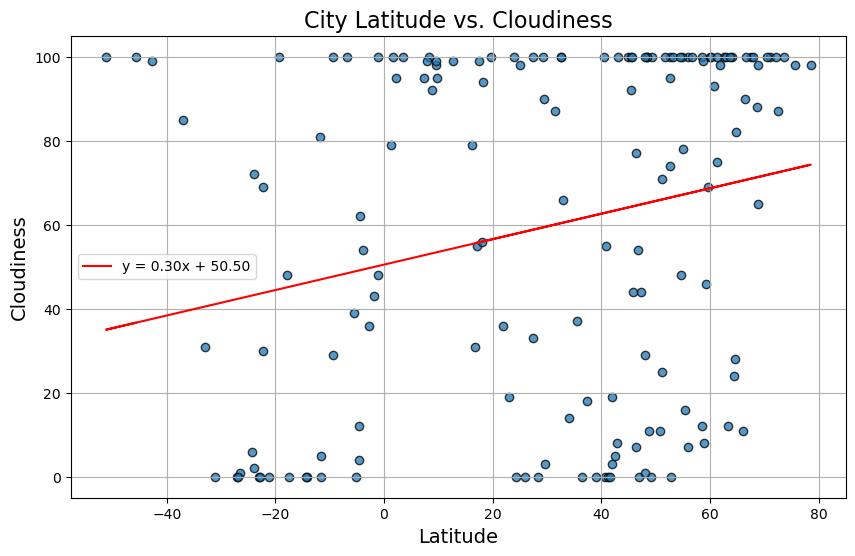

Correlation coefficient between Latitude and Cloudiness: PearsonRResult(statistic=0.2380491434207248, pvalue=0.002596253047984219)


In [17]:
#Latitude Vs Cloudiness Linear Regression
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, cloudiness)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, cloudiness)
print(f"Correlation coefficient between Latitude and Cloudiness: {correlation}")

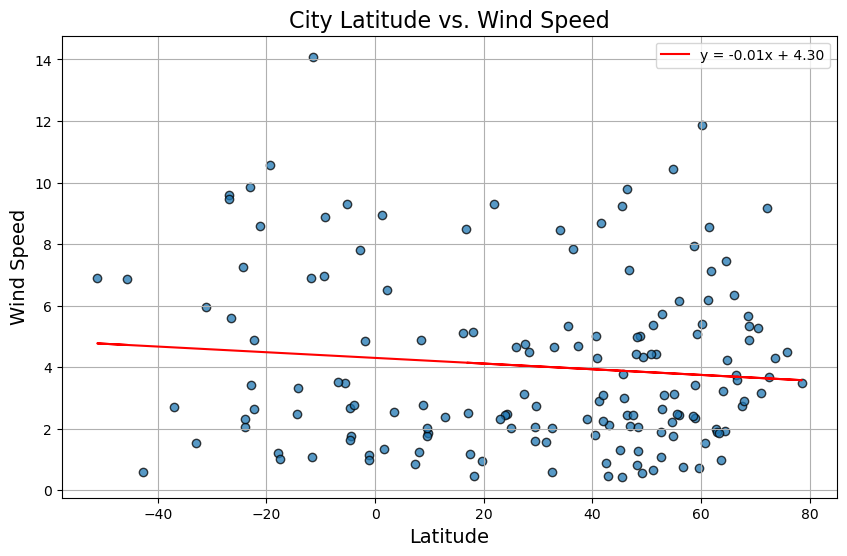

Correlation coefficient between Latitude and Wind Speed: PearsonRResult(statistic=-0.1059420322471948, pvalue=0.18522809026257434)


In [18]:
#Latitude Vs Windspeed Linear Regression
latitudes = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind_speed)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, wind_speed)
print(f"Correlation coefficient between Latitude and Wind Speed: {correlation}")

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Filter for Northern Hemisphere (latitudes > 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display the new DataFrame
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,colonia rincon viejo,17.0713,-95.1282,32.46,63,55,2.50,MX,1726428574,32.46
1,whitehorse,62.6669,-140.8534,9.62,76,100,1.99,CA,1726428576,9.62
2,buon ma thuot,27.5031,6.8259,36.45,22,33,4.76,DZ,1726428580,36.45
3,port hedland,12.7777,108.3078,20.41,98,99,2.37,VN,1726428582,20.41
4,northam,56.0243,8.8741,13.97,86,100,2.43,DK,1726428586,13.97


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
5,bredasdorp,-31.2003,118.0577,11.67,64,0,5.96,AU,1726428587,11.67
7,ulladulla,-26.9830,142.5135,10.08,31,0,9.60,AU,1726428593,10.08
10,mirny,-42.6730,171.2299,6.36,97,99,0.60,NZ,1726428608,6.36
17,hasaki,-14.1465,38.9953,23.63,58,0,3.33,MZ,1726428619,23.63
27,mugia,-22.2719,-174.9598,23.05,85,30,4.87,TO,1726428649,23.05


###  Temperature vs. Latitude Linear Regression Plot

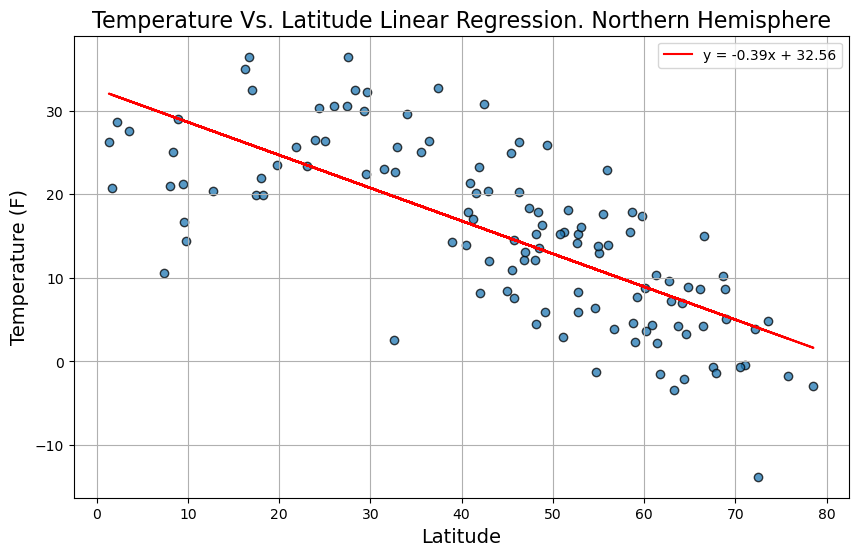

Correlation coefficient between Temperature and Latitude:  PearsonRResult(statistic=-0.7301980574555971, pvalue=3.004949260479302e-21)


In [29]:
# Linear regression on Northern Hemisphere
temperatures = northern_hemi_df["Max Temp"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, temperatures)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, temperatures, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Temperature Vs. Latitude Linear Regression. Northern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, temperatures)
print(f"Correlation coefficient between Temperature and Latitude:  {correlation}")

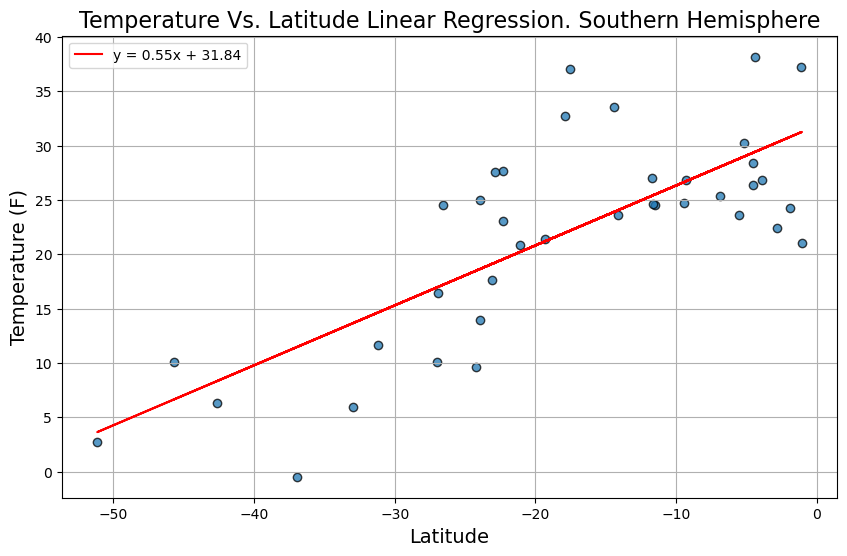

Correlation coefficient between Temperature and Latitude:  PearsonRResult(statistic=0.7542441328571028, pvalue=4.546371646625133e-08)


In [30]:
# Linear regression on Southern Hemisphere
temperatures = southern_hemi_df["Max Temp"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, temperatures)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, temperatures, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Temperature Vs. Latitude Linear Regression. Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, temperatures)
print(f"Correlation coefficient between Temperature and Latitude:  {correlation}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

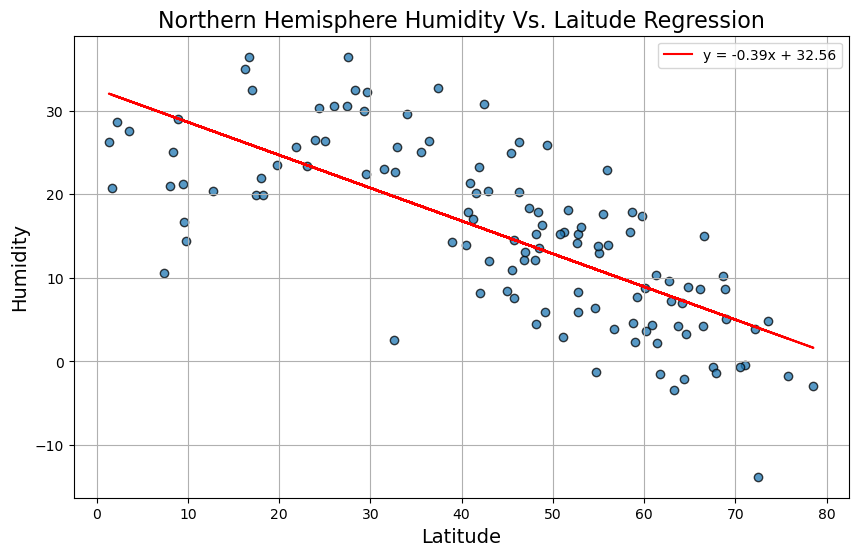

Correlation coefficient between Humidity and Latitude:  PearsonRResult(statistic=-0.7301980574555971, pvalue=3.004949260479302e-21)


In [31]:
# Northern Hemisphere Humidity Vs. Laitude Regression
humidity = northern_hemi_df["Max Temp"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Humidity Vs. Laitude Regression", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

plt.savefig("output_data/Fig11.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, humidity)
print(f"Correlation coefficient between Humidity and Latitude:  {correlation}")

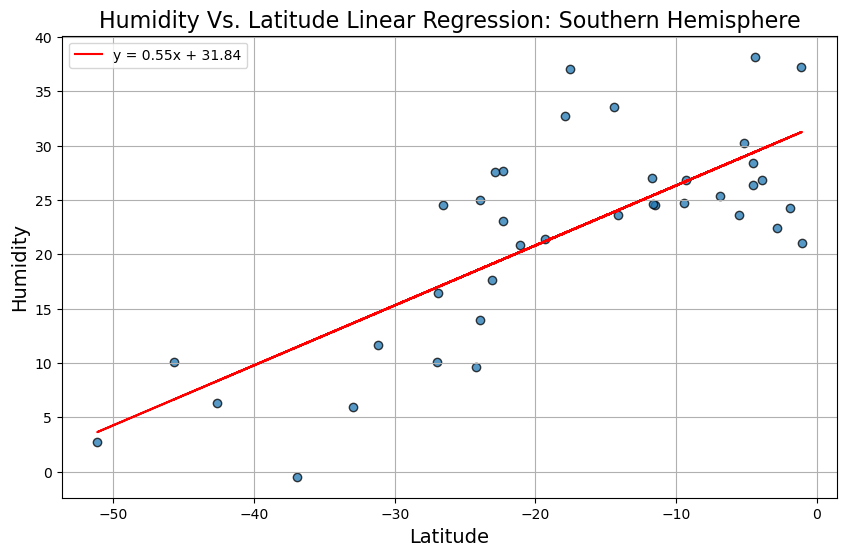

Correlation coefficient between Humidity and Latitude:  PearsonRResult(statistic=0.7542441328571028, pvalue=4.546371646625133e-08)


In [32]:
# Southern Hemisphere Humidity Vs. Latitude regression
humidity = southern_hemi_df["Max Temp"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, humidity)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, humidity, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Humidity Vs. Latitude Linear Regression: Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

plt.savefig("output_data/Fig12.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, humidity)
print(f"Correlation coefficient between Humidity and Latitude:  {correlation}")

### Cloudiness vs. Latitude Linear Regression Plot

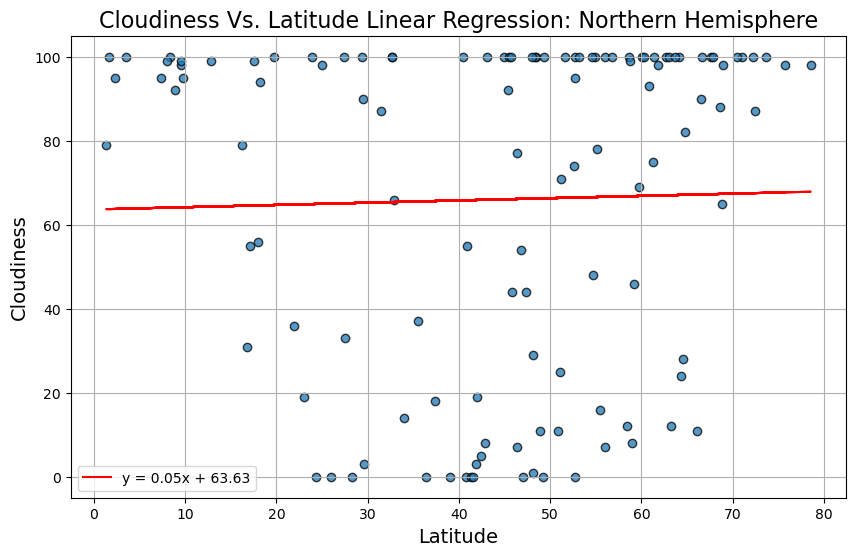

Correlation coefficient between Cloudiness and Latitude Northern Hemishphere:  PearsonRResult(statistic=0.02655931548964071, pvalue=0.7733863531342161)


In [33]:
# Northern Hemisphere. Cloudiness vs. Latitude Linear Regression
cloudiness = northern_hemi_df["Cloudiness"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, cloudiness)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Cloudiness Vs. Latitude Linear Regression: Northern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

plt.savefig("output_data/Fig13.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, cloudiness)
print(f"Correlation coefficient between Cloudiness and Latitude Northern Hemishphere:  {correlation}")

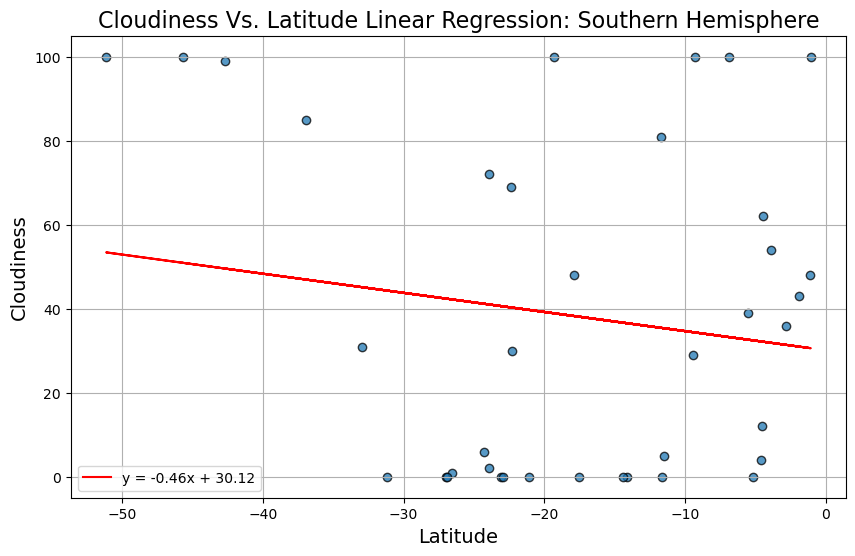

Correlation coefficient between Cloudiness and Latitude Northern Hemishphere:  PearsonRResult(statistic=-0.1508588868667786, pvalue=0.3659526248385264)


In [34]:
# Southern Hemisphere Linear Regression
cloudiness = southern_hemi_df["Cloudiness"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, cloudiness)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, cloudiness, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Cloudiness Vs. Latitude Linear Regression: Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

plt.savefig("output_data/Fig14.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, cloudiness)
print(f"Correlation coefficient between Cloudiness and Latitude Northern Hemishphere:  {correlation}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

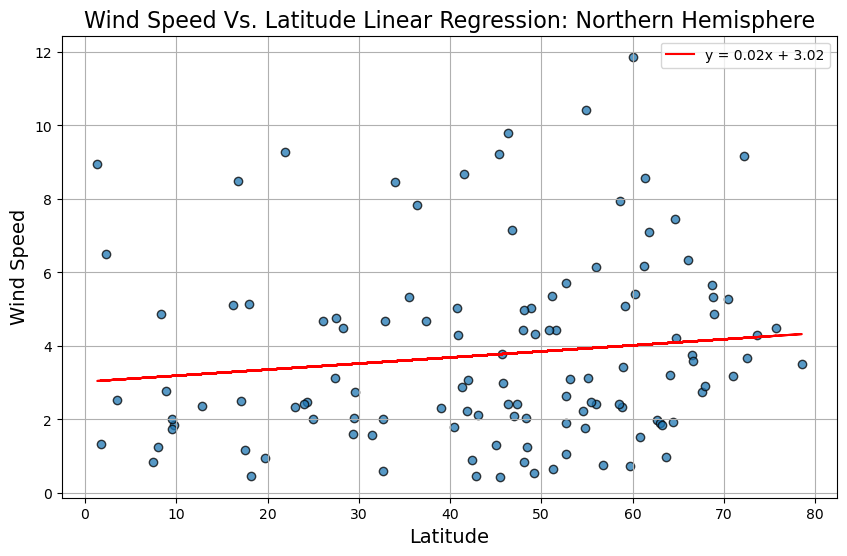

Correlation coefficient between Wind Speed and Latitude Northern Hemishphere:  PearsonRResult(statistic=0.1273659307366676, pvalue=0.16566357803662335)


In [35]:
# Wind Speed vs. Latitude Linear Regression: Northern Hemisphere
wind_speed = northern_hemi_df["Wind Speed"]
latitudes = northern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind_speed)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Wind Speed Vs. Latitude Linear Regression: Northern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

plt.savefig("output_data/Fig15.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, wind_speed)
print(f"Correlation coefficient between Wind Speed and Latitude Northern Hemishphere:  {correlation}")

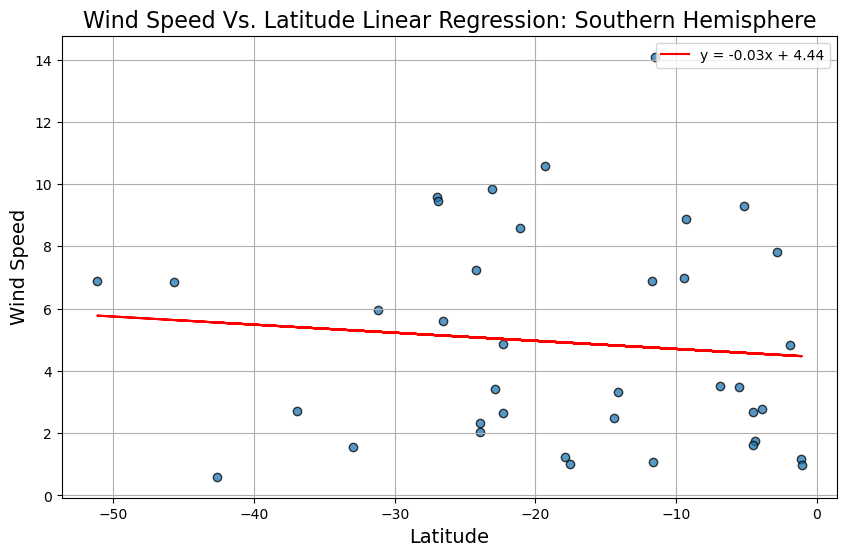

Correlation coefficient between Wind Speed and Latitude Southern Hemishphere:  PearsonRResult(statistic=-0.09820291890527949, pvalue=0.5574979639379803)


In [36]:
# Wind Speed vs. Latitude Linear Regression:  Southern Hemisphere
wind_speed = southern_hemi_df["Wind Speed"]
latitudes = southern_hemi_df["Lat"]

#Perform linear regression:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, wind_speed)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, wind_speed, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("Wind Speed Vs. Latitude Linear Regression: Southern Hemisphere", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)

plt.savefig("output_data/Fig16.png")

plt.show()

#Calculate correlation coefficient 
correlation = st.pearsonr(latitudes, wind_speed)
print(f"Correlation coefficient between Wind Speed and Latitude Southern Hemishphere:  {correlation}")

**Discussion about the linear relationship:** 

There is a very weak negative correlation between temperature and latitude. We might want to look at other graphs for more insight.
There is a very weak positive correlation between humidity and latitude, also suggesting a randomness.
There is a weak positive correlation between cloudiness and latitude.
There is a very weak negative correlation between wind speed and latitude.
Comparing graphs for Northern and Southern Hemispheres, there is a strong indication of temperature increasing when approaching 0 Latitude (Equator). The most cold places are in both poles.
Comparing graphs for Northern and Southern Hemispheres, there is a strong correlation between high humidity and latitude approaching 0. The most humid places are around the Equator, and both poles are the most dry places.
There is no strong correlation with cloudiness, when observing graphs for 2 hemispheres.
With wind statistics - it looks like it’s more windy in Antarctica compared to the Equator. Very weak wind correlation for the Northern Hemisphere.

In general with latitudes between -35 and 35 climate is more mild - with temperatures between 15 to 30 C. With latitudes -20 to 20 temperatures are between 20 C to 30 C, but with a chance of higher humidity.
For people who prefer colder climates, but don’t like the wind, the Northern Hemisphere with latitudes less than 35 is more pleasant. 
For adventurous spirited people, who don’t mind high winds and low temperatures, these graphs are not important. 
